<a href="https://colab.research.google.com/github/gameaphiwat/DWDM21/blob/main/Chap8Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-means**

##**Generate Data**

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

##**Explore Data**

In [4]:
X.shape

(500, 2)

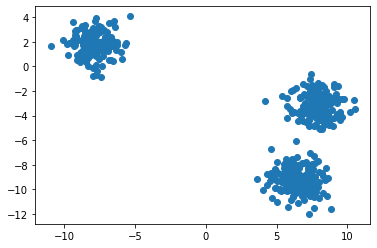

In [5]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0] , X[:,1])

##**Clustering**

###Import

In [6]:
from sklearn.cluster import KMeans

###Define

In [7]:
kmeans = KMeans(n_clusters=2, random_state=6)

### Train-Predict

In [8]:
 y_clust = kmeans.fit_predict(X)

In [9]:
 y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

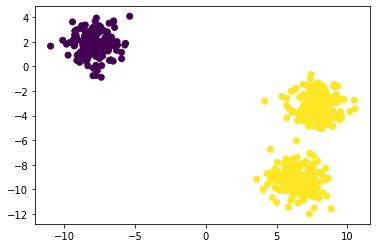

In [10]:
plt.scatter(X[:,0], X[:,1], c=y_clust)

###**3 clusters**

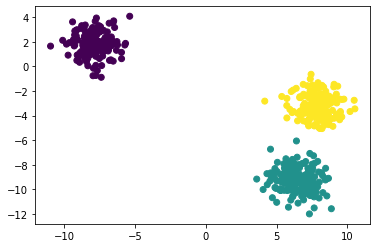

In [11]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

###**4 clusters**

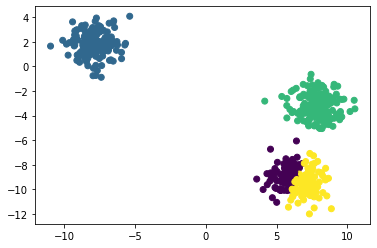

In [15]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

###**5 clusters**

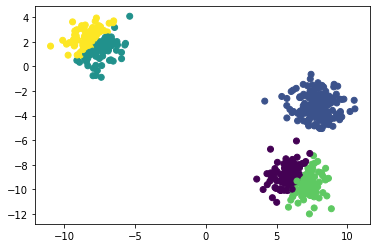

In [16]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

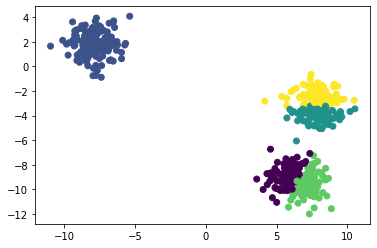

In [17]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

##**Example Application (Color Quantization)**

In [18]:
import cv2
import os

In [20]:
img = cv2.imread('/content/1449106947-Instagrams-most-famous-cat-Nala16__605.jpg')

In [21]:
img.shape

(640, 640, 3)

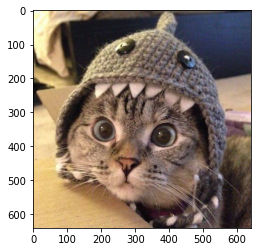

In [23]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

###**นับจำนวนสี**

In [24]:
import numpy as np

In [25]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(92097, 3)

###**จัดกลุ่มสีให้เหลือ 16 สี**

In [26]:
myquantize = KMeans(n_clusters=16,random_state=6)

####**แปลงข้อมูลให้อยู่ในรูป row-column**

In [27]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(409600, 3)

In [28]:
final_color = myquantize.fit_predict(img_row)

###**ใช้ centroid เป็นตัวแทนของสี**

In [29]:
centroid = myquantize.cluster_centers_

In [30]:
centroid

array([[105.41512433,  85.00707511,  73.19320687],
       [232.19655466, 195.05010634, 129.98834538],
       [ 56.82513763,  42.11650275,  36.6386157 ],
       [141.52827048, 109.98583449,  84.18024699],
       [210.65396107, 181.91788139, 156.90434586],
       [ 41.33169109,  45.20421234,  65.35244488],
       [138.44609882, 124.72072435, 123.72600045],
       [168.22096556, 135.65774814, 105.75447333],
       [ 82.4291204 ,  65.05960846,  56.8330358 ],
       [114.88132025, 100.40988403,  99.07475468],
       [ 54.11624511,  65.70904824,  98.10837027],
       [ 28.37237719,  22.20108368,  25.27901532],
       [204.38543759, 167.05730963, 119.71621878],
       [177.16003387, 154.4973657 , 138.48033681],
       [251.37878053, 245.58887272, 203.01908459],
       [241.00358715, 213.12794174, 168.89445079]])

In [31]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

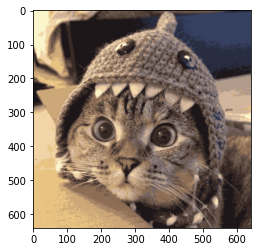

In [32]:
plt.imshow(new_img/255)

In [33]:
plt.imsave('img.jpg',new_img/255)

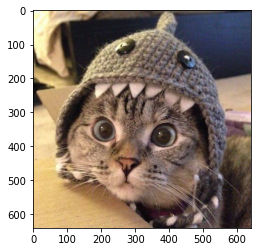

In [34]:
plt.imshow(RGB_img)

##**Hierachical Clustering**

In [ ]:
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

##**Clustering Evaluation**

In [ ]:
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation